#SIMPLE LINEAR REGRESSION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/suiciderate.zip (Unzipped Files)/master.csv")

In [ ]:
d=pd.read_csv("https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv")

In [ ]:
d.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
a=d['price'].values
b=d['bedrooms'].values

In [ ]:
b

array([3, 3, 2, ..., 2, 3, 2])

In [ ]:
df=df.fillna(df.mean())
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers


In [ ]:
df=df.drop(['country-year'],axis=1)

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,0.776601,"2,156,624,900",796,Boomers


In [ ]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [ ]:
a=df['suicides_no'].loc[(df['country']=='United States')].values
b=df['suicides/100k pop'].loc[ (df['country']=='United States')].values

In [ ]:
a=[3,1,0,4]
b=[1,2,1,3]

In [ ]:
    mean_x = np.mean(a)
    mean_y = np.mean(b)
    n= len(a)
    numer = 0
    denom = 0
    for i in range(n):
      numer += (a[i] - mean_x) * (b[i] - mean_y)
      denom += (a[i] - mean_x) ** 2
    b1 = numer / denom
    b0 = mean_y - (b1 * mean_x)

In [ ]:
b0,b1

(2.948947677982091, 7.811575787151722e-07)

In [ ]:
b0+(b1*1148000)

3.845716578347109

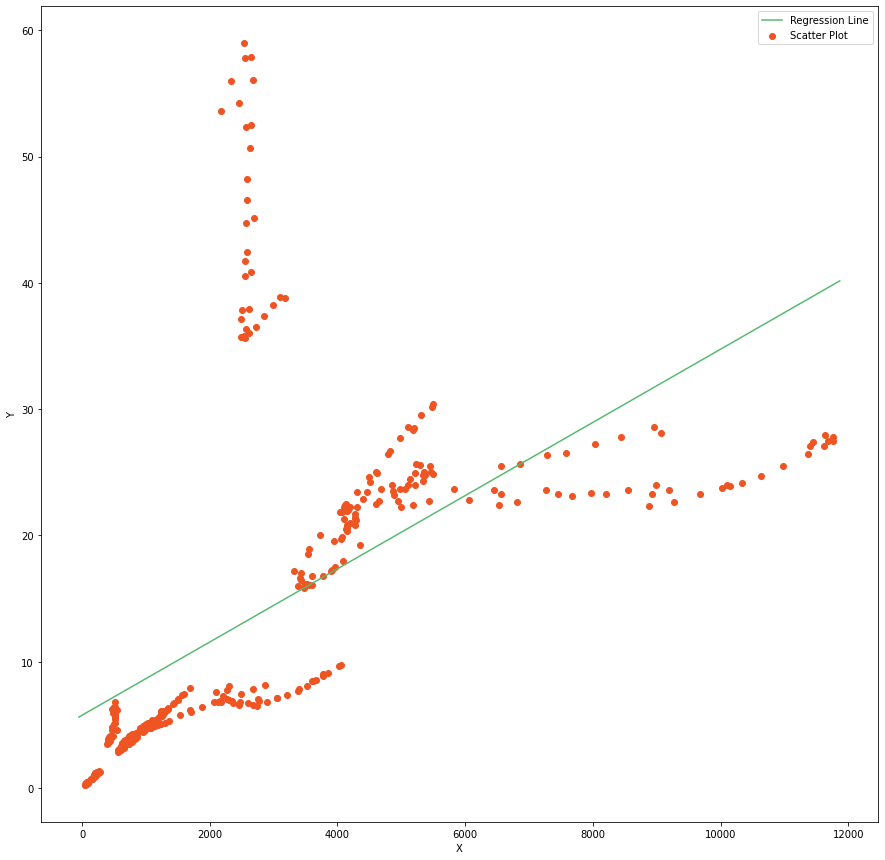

In [ ]:
    plt.figure(figsize=(15,15))
    X, Y = a,b
    max_x = np.max(X) + 100
    min_x = np.min(X) - 100
    x = np.linspace(min_x, max_x, 1000) 
    y = b0 + b1 * x
    plt.plot(x, y, color='#58b970', label='Regression Line')
    plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [ ]:
    X, Y = a,b
    rmse = 0
    n = len(X)
    for i in range(n):
        y_pred = b0 + b1 *X[i]
        rmse += (Y[i] - y_pred)**2
    rmse = round(np.sqrt(rmse/n),3)

In [ ]:
rmse

10.54

In [ ]:
    X, Y = a,b
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    n = len(X)
    ss_tot = 0
    ss_res = 0
    for i in range(n):
        y_pred = b0 + b1 *X[i]
        ss_tot += (Y[i] - mean_y)**2
        ss_res += (Y[i] - y_pred)**2
    r2 = round(1-(ss_res/ss_tot),3)

In [ ]:
r2

0.364

#MULTIPLE LINEAR REGRESSION

PREPROCESSING

In [ ]:
X= df.drop(['suicides/100k pop', 'suicides_no'], axis=1) 
y = df['suicides/100k pop']

In [ ]:
X.columns.values

In [ ]:
X[' gdp_for_year ($) '] = X[' gdp_for_year ($) '].str.replace(',', '').astype(float)

In [ ]:
X.dtypes

In [ ]:
X=pd.get_dummies(X,columns=['country','sex','age','generation'])

In [ ]:
X

In [ ]:
X.dtypes

In [ ]:
import matplotlib.pyplot as plt


  outlier detection

In [ ]:
import seaborn as sns

In [ ]:
sns.boxplot(x=y);

In [ ]:
from numpy import mean
from numpy import std

In [ ]:
m,s=mean(y),std(y)

In [ ]:
print("mean=",m)
print("std=",s)

In [ ]:
cutoff=s*3
lower, upper= m-cutoff, m+cutoff

In [ ]:
lower

In [ ]:
upper

In [ ]:
outliers=[x for x in y if (x<lower) or (x>upper)]

In [ ]:
outliers

In [ ]:
z=[x for x in y if (x>lower) and (x<upper)]  #removed outliers

In [ ]:
X=X[y<69.69]


In [ ]:
sns.boxplot(x=z);

In [ ]:
X.dtypes

In [ ]:

x=X.values
y=np.array(z)

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)

In [ ]:
  y_pred = regressor.predict(X_test)
  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_test, y_pred)
  rmse=np.sqrt(mse)

In [ ]:
print(rmse)

In [ ]:
r2_score = regressor.score(X_test, y_test)

In [ ]:
print(r2_score)